# Calculate population of weather zones from U.S. Census tracts

#### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_grid as altgrid
import numpy as np
from datetime import date

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
alt.themes.register("grid", altgrid.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")

---

## U.S. Census tracts population

In [9]:
tracts_src = pd.read_csv(
    "data/raw/acs5_2019_population_tracts.csv",
    dtype={"geoid": "str", "state": "str", "county": "str", "tract": "str"},
).drop(["universe_annotation", "universe_moe", "universe_moe_annotation"], axis=1)

In [10]:
len(tracts_src)

72877

In [13]:
tracts_src[["tract_display", "county", "state"]] = tracts_src["name"].str.split(
    ", ", expand=True
)

In [15]:
tracts_src.drop(["name"], axis=1, inplace=True)

In [27]:
tracts_src[tracts_src["geoid"] == "30027030100"]

In [34]:
len(tracts_src)

72877

---

## U.S. tracts geography

In [61]:
tracts_geo = gpd.read_file("/Users/stiles/data/gis/tracts/all/compiled.shp")

In [ ]:
tracts_geo.columns = tracts_geo.columns.str.lower()

In [63]:
tracts_geo.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,30,027,030100,30027030100,301,Census Tract 301,G5020,S,11215856971,27675054,+47.2218156,-109.2329562,"POLYGON ((-110.21360 47.41666, -110.21337 47.4..."
1,30,017,961800,30017961800,9618,Census Tract 9618,G5020,S,863180,0,+46.4037709,-105.8385775,"POLYGON ((-105.84643 46.40465, -105.84607 46.4..."
2,30,017,962000,30017962000,9620,Census Tract 9620,G5020,S,2085789,763,+46.4085584,-105.8484917,"POLYGON ((-105.86357 46.40701, -105.86327 46.4..."
3,30,049,000501,30049000501,5.01,Census Tract 5.01,G5020,S,20715258,0,+46.6799577,-112.0385289,"POLYGON ((-112.08240 46.70449, -112.08246 46.7..."
4,30,049,001202,30049001202,12.02,Census Tract 12.02,G5020,S,157748589,20044743,+46.6409035,-111.8024433,"POLYGON ((-111.93627 46.64579, -111.93551 46.6..."


In [64]:
tracts_geo = tracts_geo[["statefp", "countyfp", "geoid", "geometry", "namelsad"]].copy()

In [67]:
tracts_geo[
    (tracts_geo["statefp"] == "01") & (tracts_geo["namelsad"].str.contains("9511"))
]

,statefp,countyfp,geoid,geometry,namelsad
55901,01,071,01071951102,"POLYGON ((-86.14560 34.52001, -86.14551 34.520...",Census Tract 9511.02
55904,01,071,01071951101,"POLYGON ((-85.99869 34.59422, -85.99865 34.594...",Census Tract 9511.01


In [ ]:
len(tracts_geo)

<AxesSubplot:>

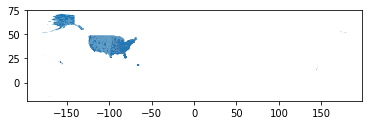

In [36]:
tracts_geo.plot()

---

In [51]:
merged = gpd.GeoDataFrame(
    pd.merge(tracts_src, tracts_geo, on="geoid", how="left", indicator=True)
)

In [53]:
merged[merged["_merge"] == "left_only"]

,geoid,universe,state,county,tract,tract_display,geometry,_merge
0,01071951100,6662.0,Alabama,Jackson County,951100,Census Tract 9511,None,left_only
5,01101002900,7844.0,Alabama,Montgomery County,002900,Census Tract 29,None,left_only
13,01093964700,5460.0,Alabama,Marion County,964700,Census Tract 9647,None,left_only
20,01009050602,9148.0,Alabama,Blount County,050602,Census Tract 506.02,None,left_only
25,01081041800,8373.0,Alabama,Lee County,041800,Census Tract 418,None,left_only
...,...,...,...,...,...,...,...,...
72842,56041975300,7941.0,Wyoming,Uinta County,975300,Census Tract 9753,None,left_only
72850,56013940300,5111.0,Wyoming,Fremont County,940300,Census Tract 9403,None,left_only
72851,56013000300,4241.0,Wyoming,Fremont County,000300,Census Tract 3,None,left_only
72865,56031959400,6914.0,Wyoming,Platte County,959400,Census Tract 9594,None,left_only


<AxesSubplot:>

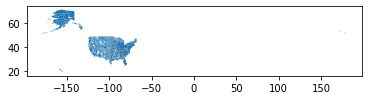

In [42]:
merged.plot()